# Step 6: Generate Summary

## Latar Belakang

In [1]:
import pandas as pd
from modules.summarize import summarize_section

csv_file_path = 'data/clean-data-csv/latarbelakang.csv'
output_summary_csv = 'data/summary-csv/latarbelakang.csv'

summarize_section(csv_file_path, output_summary_csv)

Ringkasan per dokumen telah disimpan ke data/summary-csv/latarbelakang.csv


In [2]:
sum_latar_belakang = pd.read_csv(output_summary_csv)

## Rumusan Masalah

In [3]:
csv_file_path = 'data/clean-data-csv/rumusanmasalah.csv'
output_summary_csv = 'data/summary-csv/rumusanmasalah.csv'

summarize_section(csv_file_path, output_summary_csv)

Ringkasan per dokumen telah disimpan ke data/summary-csv/rumusanmasalah.csv


In [4]:
sum_rumusan_masalah = pd.read_csv(output_summary_csv)

## Tujuan Penelitian

In [5]:
csv_file_path = 'data/clean-data-csv/tujuanpenelitian.csv'
output_summary_csv = 'data/summary-csv/tujuanpenelitian.csv'

summarize_section(csv_file_path, output_summary_csv)

Ringkasan per dokumen telah disimpan ke data/summary-csv/tujuanpenelitian.csv


In [6]:
sum_tujuan = pd.read_csv(output_summary_csv)

## Rangkuman Penelitian Terkait

In [7]:
csv_file_path = 'data/clean-data-csv/rangkumanpenelitianterkait.csv'
output_summary_csv = 'data/summary-csv/rangkumanpenelitianterkait.csv'

summarize_section(csv_file_path, output_summary_csv)

Ringkasan per dokumen telah disimpan ke data/summary-csv/rangkumanpenelitianterkait.csv


In [8]:
sum_rangkuman_penelitian = pd.read_csv(output_summary_csv)

## Metodologi Penelitian

In [9]:
csv_file_path = 'data/clean-data-csv/metodologipenelitian.csv'
output_summary_csv = 'data/summary-csv/metodologipenelitian.csv'

summarize_section(csv_file_path, output_summary_csv)

Ringkasan per dokumen telah disimpan ke data/summary-csv/metodologipenelitian.csv


In [10]:
sum_metode = pd.read_csv(output_summary_csv)

# Step 7: Analysis

In [11]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Step 1: Load datasets for the specific document Alfharizky Fauzi_Kualifikasi.txt
sections = ['latarbelakang', 'rumusanmasalah', 'tujuanpenelitian', 'rangkumanpenelitianterkait', 'metodologipenelitian']
section_texts = {}
section_stats = {}

# Collecting text and feature statistics for each section
for section in sections:
    data = pd.read_csv(f'data/clean-data-csv/{section}.csv')
    # Filter for specific document
    doc_data = data[data['nama_dokumen'] == 'Robert_Kualifikasi.txt']
    
    # Combine all sentences for the section into one text
    section_texts[section] = " ".join(doc_data['kalimat'].tolist())
    
    # Collect statistics for correlation (words_in_title, cue_words, position)
    section_stats[section] = doc_data[['words_in_title', 'cue_words', 'position']].mean()

## Cosine Similarity

Kohesi Cosine Similarity (berdasarkan teks):

Menggunakan TF-IDF untuk mewakili teks dari setiap bagian (latar belakang, rumusan masalah, dll.).
Menghitung cosine similarity antar teks bagian untuk melihat tingkat kohesi antar bagian.

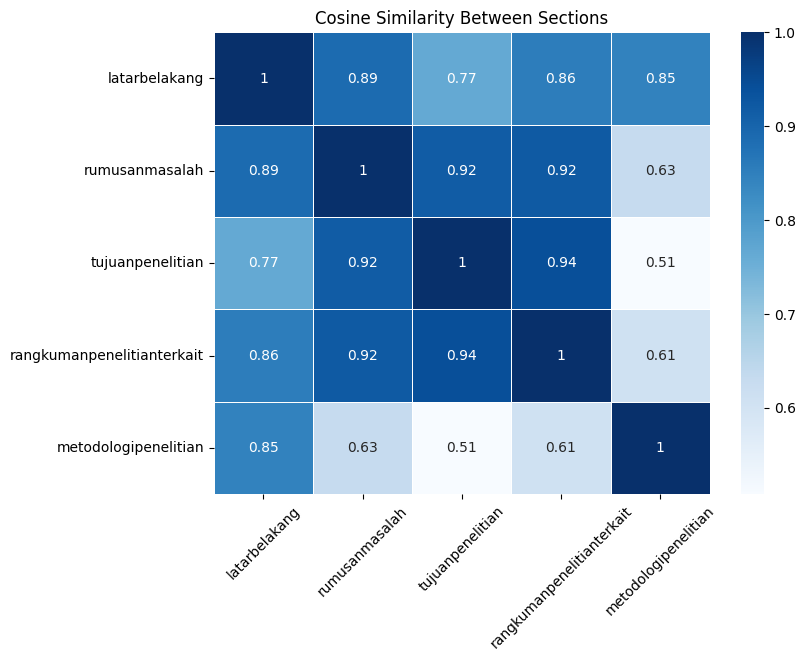

In [13]:
# Step 3: Cosine Similarity for Cohesion Analysis Across Sections (Text-based cohesion)
# Create a list of section texts
section_text_list = list(section_texts.values())

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 3))
tfidf_matrix = tfidf_vectorizer.fit_transform(section_text_list)
    
# Cosine similarity between sections
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create DataFrame for cosine similarity matrix with section names
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=sections, columns=sections)

# Visualize cosine similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_df, annot=True, cmap='Blues', linewidths=0.5)
plt.title("Cosine Similarity Between Sections")
plt.xticks(rotation=45)
plt.show()

## Latent Semantic Analysis (LSA)

Latent Semantic Analysis (LSA):

Menggunakan SVD untuk memproyeksikan teks dari setiap bagian ke dalam ruang semantik yang lebih kecil, memungkinkan kita melihat hubungan semantik antar bagian.
Visualisasi dalam 2D memungkinkan kita memahami lebih baik bagaimana bagian-bagian tersebut saling berhubungan.

### 2 Dimension

In [14]:
# Step 4: Latent Semantic Analysis (LSA) for Cohesion across Sections
n_components = 5  # Number of components for SVD
svd = TruncatedSVD(n_components=n_components)
lsa_matrix = svd.fit_transform(tfidf_matrix)

In [15]:
# The LSA matrix now represents the latent semantic relationships between sentences across sections
# Visualize the variance explained by each component
explained_variance = svd.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance)

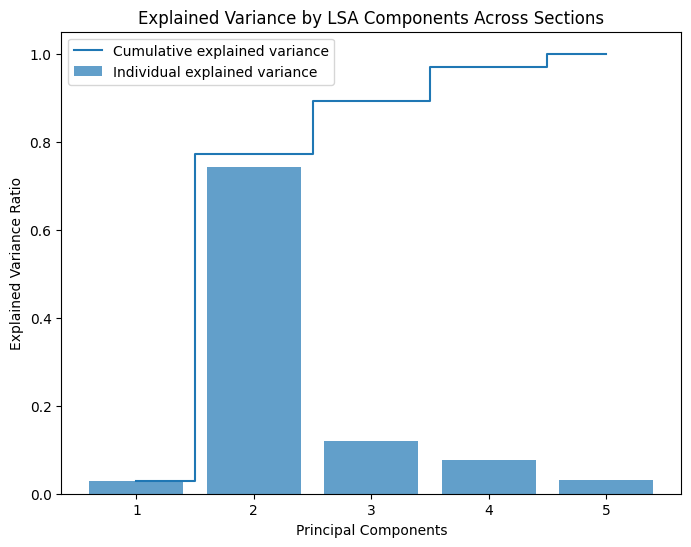

In [16]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_components+1), explained_variance, alpha=0.7, label='Individual explained variance')
plt.step(range(1, n_components+1), explained_variance_cumsum, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by LSA Components Across Sections')
plt.legend(loc='best')
plt.show()

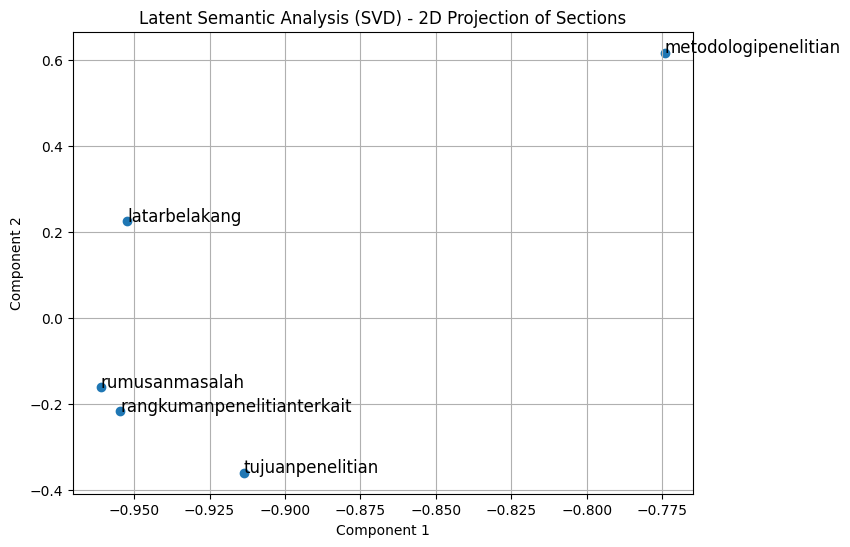

In [17]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

# Misalnya, tfidf_matrix adalah matriks TF-IDF yang telah dihasilkan sebelumnya
# SVD menghasilkan tiga matriks: U, Sigma, dan VT
U, Sigma, VT = svd(tfidf_matrix.toarray())

# Jika kita hanya ingin dua komponen, kita bisa ambil sebagian matriks U dan VT
n_components = 2  # Komponen yang diinginkan
U_reduced = U[:, :n_components]  # Ambil n komponen dari U
Sigma_reduced = np.diag(Sigma[:n_components])  # Ambil n singular values
VT_reduced = VT[:n_components, :]  # Ambil n komponen dari VT

# Hasil reduksi adalah representasi semantik latent
lsa_matrix = np.dot(U_reduced, Sigma_reduced)

# Visualisasikan hasil SVD dalam ruang 2D
plt.figure(figsize=(8, 6))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1])

# Beri label pada titik dengan nama bagian (sections)
for i, section in enumerate(sections):
    plt.text(lsa_matrix[i, 0], lsa_matrix[i, 1], section, fontsize=12)

plt.title("Latent Semantic Analysis (SVD) - 2D Projection of Sections")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


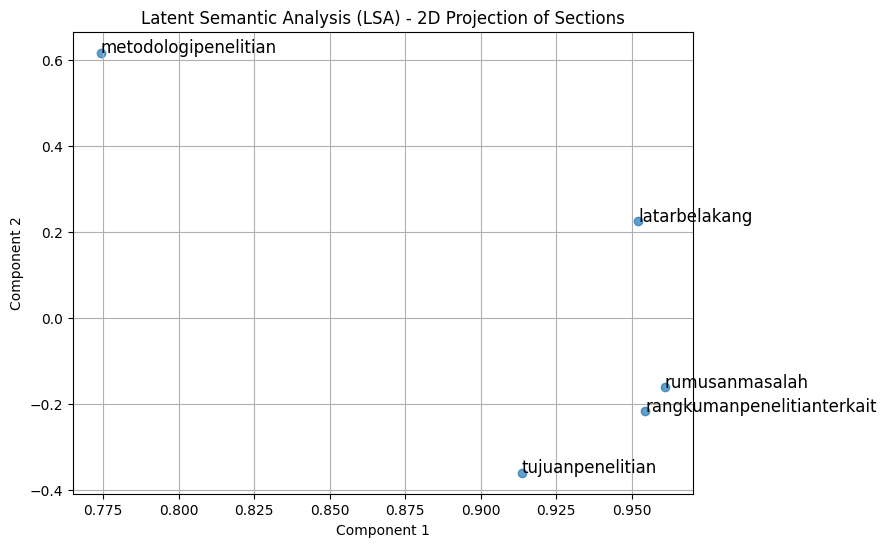

In [18]:
# Step 4: Latent Semantic Analysis (LSA) for Cohesion across Sections
n_components = 2  # Number of components for SVD
svd = TruncatedSVD(n_components=n_components)
lsa_matrix = svd.fit_transform(tfidf_matrix)

# The LSA matrix now represents the latent semantic relationships between sections
# Visualize the projection of sections in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], alpha=0.7)

# Annotate the points with section names
for i, section in enumerate(sections):
    plt.text(lsa_matrix[i, 0], lsa_matrix[i, 1], section, fontsize=12)

plt.title("Latent Semantic Analysis (LSA) - 2D Projection of Sections")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


### 3 Dimension

LSA Matrix (Latent Semantic Analysis):
                            Component_1  Component_2  Component_3
latarbelakang                  0.952310     0.223955     0.159926
rumusanmasalah                 0.960962    -0.161030     0.172427
tujuanpenelitian               0.913700    -0.359436    -0.143276
rangkumanpenelitianterkait     0.954596    -0.216714    -0.091443
metodologipenelitian           0.774257     0.615766    -0.128889


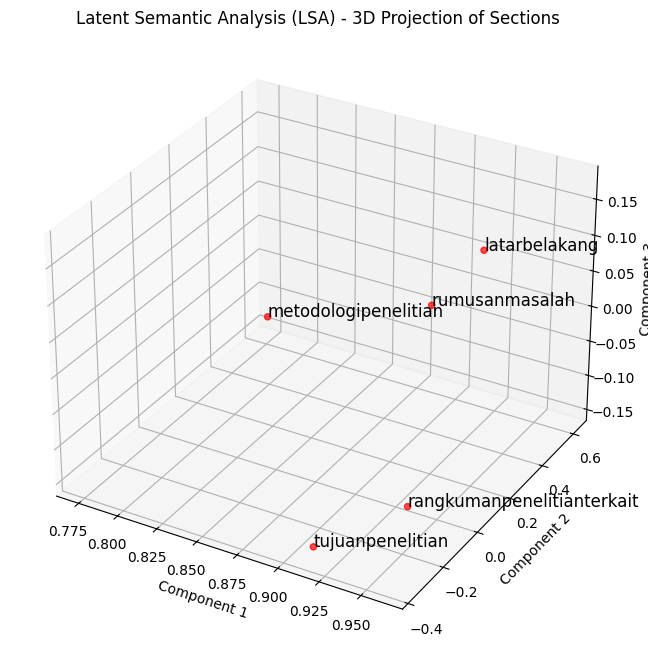

In [19]:
# Step 4: Latent Semantic Analysis (LSA) for Cohesion across Sections
n_components = 3  # Change to 3 for 3D projection
svd = TruncatedSVD(n_components=n_components)
lsa_matrix = svd.fit_transform(tfidf_matrix)

# Print LSA matrix to understand semantic projection values
lsa_df = pd.DataFrame(lsa_matrix, index=sections, columns=[f"Component_{i+1}" for i in range(n_components)])
print("LSA Matrix (Latent Semantic Analysis):")
print(lsa_df)

# The LSA matrix now represents the latent semantic relationships between sections
# Visualize the projection of sections in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D
ax.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], lsa_matrix[:, 2], c='r', marker='o', alpha=0.7)

# Annotate the points with section names
for i, section in enumerate(sections):
    ax.text(lsa_matrix[i, 0], lsa_matrix[i, 1], lsa_matrix[i, 2], section, fontsize=12)

# Set labels and title for the 3D plot
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
plt.title("Latent Semantic Analysis (LSA) - 3D Projection of Sections")
plt.grid(True)

# Show plot
plt.show()

# Step 8: Make Final dataset

In [20]:
import os
from modules.summarize import create_paragraph

# Direktori input dan output
clean_data_dir = "data/clean-data-csv"
summary_data_dir = "data/summary-csv"
final_data_dir = "data/final-data"

# Pastikan direktori final ada, jika tidak buat baru
os.makedirs(final_data_dir, exist_ok=True)

# Ambil semua file CSV di folder clean-data-csv
file_names = [f for f in os.listdir(summary_data_dir) if f.endswith('.csv')]

# Proses setiap file
for file_name in file_names:
    # Baca file dari clean-data-csv
    clean_file_path = os.path.join(clean_data_dir, file_name)
    clean_df = pd.read_csv(clean_file_path)
    
    # Gabungkan kalimat menjadi paragraf
    paragraphs_df = create_paragraph(clean_df)
    
    # Baca file summary dari summary-csv
    summary_file_path = os.path.join(summary_data_dir, file_name)
    summary_df = pd.read_csv(summary_file_path)
    
    # Pastikan kolom 'summary' ada di file summary
    if 'summary' not in summary_df.columns:
        summary_df.columns = ['nama_dokumen', 'summary']
    
    # Gabungkan paragraf dengan summary
    merged_df = pd.merge(paragraphs_df, summary_df, on='nama_dokumen', how='inner')
    
    # Simpan hasil ke final-data
    final_file_path = os.path.join(final_data_dir, file_name)
    merged_df.to_csv(final_file_path, index=False)

    print(f"File {file_name} berhasil diproses dan disimpan ke {final_file_path}.")

File judul.csv berhasil diproses dan disimpan ke data/final-data\judul.csv.
File latarbelakang.csv berhasil diproses dan disimpan ke data/final-data\latarbelakang.csv.
File metodologipenelitian.csv berhasil diproses dan disimpan ke data/final-data\metodologipenelitian.csv.
File rangkumanpenelitianterkait.csv berhasil diproses dan disimpan ke data/final-data\rangkumanpenelitianterkait.csv.
File rumusanmasalah.csv berhasil diproses dan disimpan ke data/final-data\rumusanmasalah.csv.
File tujuanpenelitian.csv berhasil diproses dan disimpan ke data/final-data\tujuanpenelitian.csv.


In [1]:
import pandas as pd
import os

# Directory and file parts
sections = ['latarbelakang', 'rumusanmasalah', 'tujuanpenelitian', 'rangkumanpenelitianterkait', 'metodologipenelitian']
base_dir = 'data/final-data/'

# Document lists for val and test sets
val_docs = [
    'Utami Lestari_Kualifikasi.txt',
    'Kualifikasi Witta Listiya Ningrum.txt',
    'Kualifikasi_Remigius.txt'
]

test_docs = [
    'Robert_Kualifikasi.txt',
    'MetaMeysawati_KUALIFIKASI(99216026).txt',
    'Kualifikasi_Rama Dian Syah.txt'
]

# Function to split the data
def split_data(section):
    # Load the data
    file_path = os.path.join(base_dir, f'{section}.csv')
    df = pd.read_csv(file_path)
    
    # Create val.csv, test.csv, and train.csv based on conditions
    val_df = df[df['nama_dokumen'].isin(val_docs)]
    test_df = df[df['nama_dokumen'].isin(test_docs)]
    train_df = df[~df['nama_dokumen'].isin(val_docs + test_docs)]
    
    # Create section directory if it doesn't exist
    section_dir = os.path.join(base_dir, section)
    os.makedirs(section_dir, exist_ok=True)
    
    # Save to CSV
    val_df.to_csv(os.path.join(section_dir, 'val.csv'), index=False)
    test_df.to_csv(os.path.join(section_dir, 'test.csv'), index=False)
    train_df.to_csv(os.path.join(section_dir, 'train.csv'), index=False)
    
    print(f'Split data for {section} saved to {section_dir}')

# Process each section
for section in sections:
    split_data(section)

Split data for latarbelakang saved to data/final-data/latarbelakang
Split data for rumusanmasalah saved to data/final-data/rumusanmasalah
Split data for tujuanpenelitian saved to data/final-data/tujuanpenelitian
Split data for rangkumanpenelitianterkait saved to data/final-data/rangkumanpenelitianterkait
Split data for metodologipenelitian saved to data/final-data/metodologipenelitian
